This notebook initially presents every dataframe found in the .zip folder that the researchers used. Then, it tries to draw out conclusions from each of them, where possible.

Later, 7 variables used in the research were extracted (line 27) from each of the dataframes. Those variables have been analysed through various charts and through interpreting their mean and median values, as well as their standard deviation. Each of the unique values in those variables has been given a numerical value for easier interpretation and easier extraction of their mean, std, min, max and median scores.

In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression, LogisticRegression, Ridge
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_predict, train_test_split
from sklearn.metrics import mean_squared_error, auc, roc_curve, classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
import statsmodels.formula.api as smf
import statistics
from scipy import stats

In [2]:
assessments = pd.read_csv ("Assessments.csv")
assessments

,code_module,code_presentation,id_assessment,assessment_type,date,weight
0,AAA,2013J,1752,TMA,19.0,10.0
1,AAA,2013J,1753,TMA,54.0,20.0
2,AAA,2013J,1754,TMA,117.0,20.0
3,AAA,2013J,1755,TMA,166.0,20.0
4,AAA,2013J,1756,TMA,215.0,30.0
...,...,...,...,...,...,...
201,GGG,2014J,37443,CMA,229.0,0.0
202,GGG,2014J,37435,TMA,61.0,0.0
203,GGG,2014J,37436,TMA,124.0,0.0
204,GGG,2014J,37437,TMA,173.0,0.0


Descriptive statistics for assessments:

In [3]:
assessments.drop(("id_assessment"), axis=1, inplace=True) # monotonous value
assessments

,code_module,code_presentation,assessment_type,date,weight
0,AAA,2013J,TMA,19.0,10.0
1,AAA,2013J,TMA,54.0,20.0
2,AAA,2013J,TMA,117.0,20.0
3,AAA,2013J,TMA,166.0,20.0
4,AAA,2013J,TMA,215.0,30.0
...,...,...,...,...,...
201,GGG,2014J,CMA,229.0,0.0
202,GGG,2014J,TMA,61.0,0.0
203,GGG,2014J,TMA,124.0,0.0
204,GGG,2014J,TMA,173.0,0.0


In [4]:
assessments.columns.values

array(['code_module', 'code_presentation', 'assessment_type', 'date',
       'weight'], dtype=object)

In [5]:
assessments.describe()

,date,weight
count,195.000000,206.000000
mean,145.005128,20.873786
std,76.001119,30.384224
min,12.000000,0.000000
25%,71.000000,0.000000
50%,152.000000,12.500000
75%,222.000000,24.250000
max,261.000000,100.000000


In [6]:
assessments.dtypes

code_module           object
code_presentation     object
assessment_type       object
date                 float64
weight               float64
dtype: object

In [7]:
assessments.nunique()

code_module           7
code_presentation     4
assessment_type       3
date                 74
weight               24
dtype: int64

In [8]:
assessments.isna().sum() # date is the number of days between when a student registered for a course and when the course started

code_module           0
code_presentation     0
assessment_type       0
date                 11
weight                0
dtype: int64

In [9]:
# filling missing "date" values with the most common value
most_common_date = assessments ["date"].mode()[0]
assessments["date"].fillna(most_common_date, inplace = True)
assessments

,code_module,code_presentation,assessment_type,date,weight
0,AAA,2013J,TMA,19.0,10.0
1,AAA,2013J,TMA,54.0,20.0
2,AAA,2013J,TMA,117.0,20.0
3,AAA,2013J,TMA,166.0,20.0
4,AAA,2013J,TMA,215.0,30.0
...,...,...,...,...,...
201,GGG,2014J,CMA,229.0,0.0
202,GGG,2014J,TMA,61.0,0.0
203,GGG,2014J,TMA,124.0,0.0
204,GGG,2014J,TMA,173.0,0.0


In [10]:
assessments.isna().sum()

code_module          0
code_presentation    0
assessment_type      0
date                 0
weight               0
dtype: int64

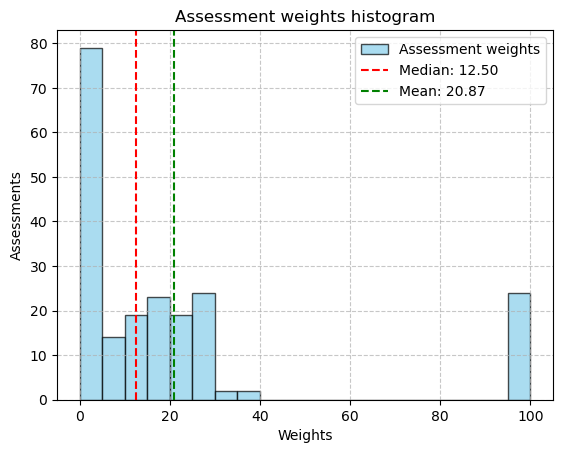

In [11]:
weights = assessments["weight"]

# Creating the histogram
plt.hist(weights, bins=20, edgecolor='black', alpha=0.7, color='skyblue', label="Assessment weights")

# Calculating median and mean (again)
median = weights.median()
mean = weights.mean()

# Adding vertical dashed lines for median and mean
plt.axvline(median, color='red', linestyle='--', label=f'Median: {median:.2f}')
plt.axvline(mean, color='green', linestyle='--', label=f'Mean: {mean:.2f}')

# Setting labels
plt.xlabel("Weights")
plt.ylabel("Assessments")

# Setting the title
plt.title("Assessment weights histogram")

# Adding a grid
plt.grid(True, linestyle='--', alpha=0.7)

# Adding a legend in the top right corner
plt.legend(loc="upper right")

plt.show()

In [12]:
output_file_path = "transformed_assessments.csv"

assessments.to_csv(output_file_path, index=False)

print(f"Transformed dataset saved to {output_file_path}")

Transformed dataset saved to transformed_assessments.csv


The "Assessments.csv" file isn't meant to be a dataframe with any data which might lead to statistic inference, therefore it hasn't been analysed as closely as later examples in this notebook. It simply serves as a summary of various variables used in the paper in order to familiarise the reader with the way data is distributed in the paper. Noteworthy variables are "date", which represents the number of days between when a student registered for a course and when the course started and "weight", which was the value assigned to various assessments, summing up to 100%.

*------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------*

In [13]:
courses = pd.read_csv ("courses.csv")
courses

,code_module,code_presentation,module_presentation_length
0,AAA,2013J,268
1,AAA,2014J,269
2,BBB,2013J,268
3,BBB,2014J,262
4,BBB,2013B,240
5,BBB,2014B,234
6,CCC,2014J,269
7,CCC,2014B,241
8,DDD,2013J,261
9,DDD,2014J,262


In [14]:
courses.nunique()

code_module                   7
code_presentation             4
module_presentation_length    7
dtype: int64

In [15]:
courses.isna().sum()

code_module                   0
code_presentation             0
module_presentation_length    0
dtype: int64

In [16]:
courses.dtypes

code_module                   object
code_presentation             object
module_presentation_length     int64
dtype: object

Similar to the previous file, the "Courses.csv" file serves as an overview of potential values certain variables can take. Unlike the previous file, there are no missing or monotonous values here that might need correction so this file is left as it was initally.

*------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------*

In [17]:
stud_assessment = pd.read_csv ("studentAssessment.csv")
stud_assessment

,id_assessment,id_student,date_submitted,is_banked,score
0,1752,11391,18,0,78.0
1,1752,28400,22,0,70.0
2,1752,31604,17,0,72.0
3,1752,32885,26,0,69.0
4,1752,38053,19,0,79.0
...,...,...,...,...,...
173907,37443,527538,227,0,60.0
173908,37443,534672,229,0,100.0
173909,37443,546286,215,0,80.0
173910,37443,546724,230,0,100.0


In [18]:
unique_values = stud_assessment["is_banked"].unique()

# Display the unique values
print(unique_values)

[0 1]


In [19]:
stud_assessment.isna().sum()

id_assessment       0
id_student          0
date_submitted      0
is_banked           0
score             173
dtype: int64

In [20]:
# replacing missing "score" values with median values
median_score = stud_assessment["score"].median()
stud_assessment["score"].fillna(median_score, inplace=True)
stud_assessment

,id_assessment,id_student,date_submitted,is_banked,score
0,1752,11391,18,0,78.0
1,1752,28400,22,0,70.0
2,1752,31604,17,0,72.0
3,1752,32885,26,0,69.0
4,1752,38053,19,0,79.0
...,...,...,...,...,...
173907,37443,527538,227,0,60.0
173908,37443,534672,229,0,100.0
173909,37443,546286,215,0,80.0
173910,37443,546724,230,0,100.0


In [21]:
stud_assessment.isna().sum()

id_assessment     0
id_student        0
date_submitted    0
is_banked         0
score             0
dtype: int64

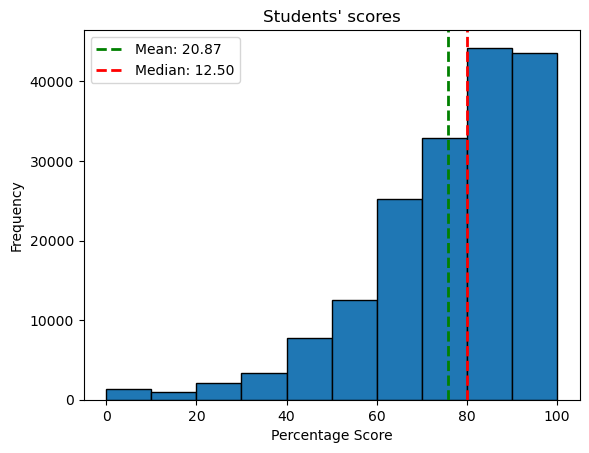

In [22]:
data = stud_assessment["score"]

plt.hist(stud_assessment["score"], bins=10, edgecolor='black')
plt.xlabel("Percentage Score")
plt.ylabel("Frequency")
plt.title("Students' scores")

mean_value = stud_assessment["score"].mean()
median_value = stud_assessment["score"].median()
plt.axvline(mean_value, color="green", linestyle="dashed", linewidth=2, label=f"Mean: {mean:.2f}")
plt.axvline(median_value, color="red", linestyle="dashed", linewidth=2, label=f"Median: {median:.2f}")

plt.legend(loc="upper left")

plt.show()

The "studentAssessment.csv" file contains 2 types of identificators, those belonging to the assessment and those belonging to students. The columns "date_submitted" and "is_banked" don't appear within the paper and are therefore impossible to analyse further without knowing what they refer to. The variable "score" represents the mark of a student’s submission to the first assignment. 

*------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------*

In [23]:
stud_info = pd.read_csv ("studentInfo.csv")
stud_info

,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result
0,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass
1,AAA,2013J,28400,F,Scotland,HE Qualification,20-30%,35-55,0,60,N,Pass
2,AAA,2013J,30268,F,North Western Region,A Level or Equivalent,30-40%,35-55,0,60,Y,Withdrawn
3,AAA,2013J,31604,F,South East Region,A Level or Equivalent,50-60%,35-55,0,60,N,Pass
4,AAA,2013J,32885,F,West Midlands Region,Lower Than A Level,50-60%,0-35,0,60,N,Pass
...,...,...,...,...,...,...,...,...,...,...,...,...
32588,GGG,2014J,2640965,F,Wales,Lower Than A Level,10-20,0-35,0,30,N,Fail
32589,GGG,2014J,2645731,F,East Anglian Region,Lower Than A Level,40-50%,35-55,0,30,N,Distinction
32590,GGG,2014J,2648187,F,South Region,A Level or Equivalent,20-30%,0-35,0,30,Y,Pass
32591,GGG,2014J,2679821,F,South East Region,Lower Than A Level,90-100%,35-55,0,30,N,Withdrawn


*------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------*

In [24]:
stud_registration = pd.read_csv ("studentRegistration.csv")
stud_registration

,code_module,code_presentation,id_student,date_registration,date_unregistration
0,AAA,2013J,11391,-159.0,NaN
1,AAA,2013J,28400,-53.0,NaN
2,AAA,2013J,30268,-92.0,12.0
3,AAA,2013J,31604,-52.0,NaN
4,AAA,2013J,32885,-176.0,NaN
...,...,...,...,...,...
32588,GGG,2014J,2640965,-4.0,NaN
32589,GGG,2014J,2645731,-23.0,NaN
32590,GGG,2014J,2648187,-129.0,NaN
32591,GGG,2014J,2679821,-49.0,101.0


*------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------*

In [25]:
studentVle = pd.read_csv ("studentVle.csv")
studentVle

,code_module,code_presentation,id_student,id_site,date,sum_click
0,AAA,2013J,28400,546652,-10,4
1,AAA,2013J,28400,546652,-10,1
2,AAA,2013J,28400,546652,-10,1
3,AAA,2013J,28400,546614,-10,11
4,AAA,2013J,28400,546714,-10,1
...,...,...,...,...,...,...
10655275,GGG,2014J,675811,896943,269,3
10655276,GGG,2014J,675578,896943,269,1
10655277,GGG,2014J,654064,896943,269,3
10655278,GGG,2014J,654064,896939,269,1


*------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------*

In [26]:
vle = pd.read_csv("vle.csv")
vle

,id_site,code_module,code_presentation,activity_type,week_from,week_to
0,546943,AAA,2013J,resource,NaN,NaN
1,546712,AAA,2013J,oucontent,NaN,NaN
2,546998,AAA,2013J,resource,NaN,NaN
3,546888,AAA,2013J,url,NaN,NaN
4,547035,AAA,2013J,resource,NaN,NaN
...,...,...,...,...,...,...
6359,897063,GGG,2014J,resource,NaN,NaN
6360,897109,GGG,2014J,resource,NaN,NaN
6361,896965,GGG,2014J,oucontent,NaN,NaN
6362,897060,GGG,2014J,resource,NaN,NaN


In [27]:
# Extracting specific columns from each previous Dataframe
score_column = stud_assessment["score"]
highest_education_column = stud_info["highest_education"]
sum_click_column = studentVle["sum_click"]
date_registration_column = stud_registration["date_registration"]
age_band_column = stud_info["age_band"]
disability_column = stud_info["disability"]
gender_column = stud_info["gender"]
num_of_prev_attempts_column = stud_info["num_of_prev_attempts"]

# Creating a new Dataframe by concatenating the selected columns
combined_df = pd.concat([score_column, highest_education_column, sum_click_column,
                        date_registration_column, age_band_column, disability_column, gender_column,
                        num_of_prev_attempts_column], axis=1)

combined_df

,score,highest_education,sum_click,date_registration,age_band,disability,gender,num_of_prev_attempts
0,78.0,HE Qualification,4,-159.0,55<=,N,M,0.0
1,70.0,HE Qualification,1,-53.0,35-55,N,F,0.0
2,72.0,A Level or Equivalent,1,-92.0,35-55,Y,F,0.0
3,69.0,A Level or Equivalent,11,-52.0,35-55,N,F,0.0
4,79.0,Lower Than A Level,1,-176.0,0-35,N,F,0.0
...,...,...,...,...,...,...,...,...
10655275,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN
10655276,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN
10655277,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN
10655278,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN


In [28]:
combined_df.columns.values

array(['score', 'highest_education', 'sum_click', 'date_registration',
       'age_band', 'disability', 'gender', 'num_of_prev_attempts'],
      dtype=object)

In [29]:
combined_df.describe()

,score,sum_click,date_registration,num_of_prev_attempts
count,173912.000000,1.065528e+07,32548.000000,32593.000000
mean,75.803751,3.716946e+00,-69.411300,0.163225
std,18.789222,8.849047e+00,49.260522,0.479758
min,0.000000,1.000000e+00,-322.000000,0.000000
25%,65.000000,1.000000e+00,-100.000000,0.000000
50%,80.000000,2.000000e+00,-57.000000,0.000000
75%,90.000000,3.000000e+00,-29.000000,0.000000
max,100.000000,6.977000e+03,167.000000,6.000000


In [30]:
combined_df.nunique()

score                   101
highest_education         5
sum_click               498
date_registration       332
age_band                  3
disability                2
gender                    2
num_of_prev_attempts      7
dtype: int64

In [31]:
combined_df.isna().sum()

score                   10481368
highest_education       10622687
sum_click                      0
date_registration       10622732
age_band                10622687
disability              10622687
gender                  10622687
num_of_prev_attempts    10622687
dtype: int64

In [32]:
missing_values_start = combined_df.isna().idxmax()

print("Index where NaN values start:")
print(missing_values_start)
# missing values start to appear after 32593rd student, because 32593 registered students were included in this research

Index where NaN values start:
score                   173912
highest_education        32593
sum_click                    0
date_registration         2344
age_band                 32593
disability               32593
gender                   32593
num_of_prev_attempts     32593
dtype: int64


In [33]:
# there are 32593 registered students (according to the paper), so the rest are empty
start_index = 32593

# Displaying rows from the start_index onward
combined_df.loc[start_index:]

,score,highest_education,sum_click,date_registration,age_band,disability,gender,num_of_prev_attempts
32593,50.0,NaN,1,NaN,NaN,NaN,NaN,NaN
32594,87.0,NaN,6,NaN,NaN,NaN,NaN,NaN
32595,94.0,NaN,3,NaN,NaN,NaN,NaN,NaN
32596,78.0,NaN,16,NaN,NaN,NaN,NaN,NaN
32597,91.0,NaN,1,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
10655275,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN
10655276,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN
10655277,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN
10655278,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN


In [34]:
before_index = combined_df.index < 32593
after_index = combined_df.index >= 32593

# Calculating median value
median_value = combined_df["score"].median()

# Filling NaN values (score values) before the index with the median
combined_df.loc[before_index, "score"] = combined_df.loc[before_index, "score"].fillna(median_value)

# Dropping all rows with NaN values after the index in every column (data missing)
df1 = combined_df.dropna(subset=["score", "highest_education", "sum_click", "date_registration", "age_band", "disability", "gender", "num_of_prev_attempts"], axis=0)

df1

,score,highest_education,sum_click,date_registration,age_band,disability,gender,num_of_prev_attempts
0,78.0,HE Qualification,4,-159.0,55<=,N,M,0.0
1,70.0,HE Qualification,1,-53.0,35-55,N,F,0.0
2,72.0,A Level or Equivalent,1,-92.0,35-55,Y,F,0.0
3,69.0,A Level or Equivalent,11,-52.0,35-55,N,F,0.0
4,79.0,Lower Than A Level,1,-176.0,0-35,N,F,0.0
...,...,...,...,...,...,...,...,...
32588,73.0,Lower Than A Level,1,-4.0,0-35,N,F,0.0
32589,81.0,Lower Than A Level,4,-23.0,35-55,N,F,0.0
32590,77.0,A Level or Equivalent,5,-129.0,0-35,Y,F,0.0
32591,83.0,Lower Than A Level,5,-49.0,35-55,N,F,0.0


In [35]:
df1.isna().sum()

score                   0
highest_education       0
sum_click               0
date_registration       0
age_band                0
disability              0
gender                  0
num_of_prev_attempts    0
dtype: int64

In [36]:
df1.nunique()

score                    96
highest_education         5
sum_click                66
date_registration       332
age_band                  3
disability                2
gender                    2
num_of_prev_attempts      7
dtype: int64

In [37]:
df1.describe()

,score,sum_click,date_registration,num_of_prev_attempts
count,32548.000000,32548.000000,32548.000000,32548.000000
mean,77.151254,4.275501,-69.411300,0.163144
std,17.059073,5.316720,49.260522,0.479452
min,0.000000,1.000000,-322.000000,0.000000
25%,66.000000,1.000000,-100.000000,0.000000
50%,79.000000,2.000000,-57.000000,0.000000
75%,89.000000,5.000000,-29.000000,0.000000
max,100.000000,144.000000,167.000000,6.000000


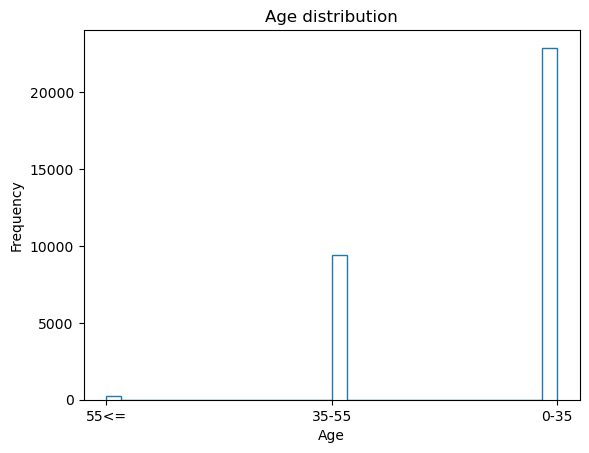

In [38]:
# showing age distribution between 3 possible answers: 0-35, 35-55 and >55
plt.hist(df1.age_band, bins=30, histtype='step')

plt.xlabel("Age")
plt.ylabel("Frequency")
plt.title("Age distribution")

plt.show()

A large majority of the participants were between the ages of 0 and 35, significantly less participants were aged 35-55, while there was barely any participants aged over the age of 55.

In [39]:
df1.dtypes

score                   float64
highest_education        object
sum_click                 int64
date_registration       float64
age_band                 object
disability               object
gender                   object
num_of_prev_attempts    float64
dtype: object

In [40]:
df1["age_band"].unique() # despite the fact that certain participants were over the age of 55 (>=55), the data found in the paper marks those participants as "55<="

array(['55<=', '35-55', '0-35'], dtype=object)

In [41]:
# Mapping "age_band" values to numerical encoding for easier access later
age_band_mapping = {"0-35": 0, "35-55": 1, "55<=": 2}

# Applying the mapping to the 'age_band' column
df1["age_band_encoded"] = df1["age_band"].map(age_band_mapping)

# Displaying the modified DataFrame
df1[["age_band", "age_band_encoded"]]

C:\Users\grga3\AppData\Local\Temp\ipykernel_11484\2245762481.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["age_band_encoded"] = df1["age_band"].map(age_band_mapping)


,age_band,age_band_encoded
0,55<=,2
1,35-55,1
2,35-55,1
3,35-55,1
4,0-35,0
...,...,...
32588,0-35,0
32589,35-55,1
32590,0-35,0
32591,35-55,1


In [42]:
df1.drop(("age_band"), axis=1, inplace=True)
df1

C:\Users\grga3\AppData\Local\Temp\ipykernel_11484\1740463879.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.drop(("age_band"), axis=1, inplace=True)


,score,highest_education,sum_click,date_registration,disability,gender,num_of_prev_attempts,age_band_encoded
0,78.0,HE Qualification,4,-159.0,N,M,0.0,2
1,70.0,HE Qualification,1,-53.0,N,F,0.0,1
2,72.0,A Level or Equivalent,1,-92.0,Y,F,0.0,1
3,69.0,A Level or Equivalent,11,-52.0,N,F,0.0,1
4,79.0,Lower Than A Level,1,-176.0,N,F,0.0,0
...,...,...,...,...,...,...,...,...
32588,73.0,Lower Than A Level,1,-4.0,N,F,0.0,0
32589,81.0,Lower Than A Level,4,-23.0,N,F,0.0,1
32590,77.0,A Level or Equivalent,5,-129.0,Y,F,0.0,0
32591,83.0,Lower Than A Level,5,-49.0,N,F,0.0,1


In [43]:
df1.dtypes

score                   float64
highest_education        object
sum_click                 int64
date_registration       float64
disability               object
gender                   object
num_of_prev_attempts    float64
age_band_encoded          int64
dtype: object

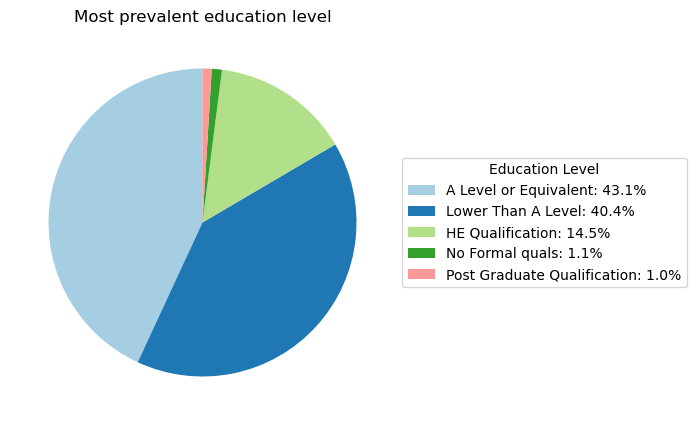

In [44]:
# Counting the occurrences of each education level
education_counts = df1["highest_education"].value_counts()

percentages = education_counts / education_counts.sum() * 100

plt.figure(figsize=(5, 5))
patches, labels, _ = plt.pie(education_counts, labels=None, autopct="", startangle=90, colors=plt.cm.Paired.colors)

# percentages are displayed on the legend for practicality
legend_labels = [f"{label}: {percent:.1f}%" for label, percent in zip(education_counts.index, percentages)]
plt.legend(patches, legend_labels, title="Education Level", loc="center left", bbox_to_anchor=(1, 0.5))

plt.title("Most prevalent education level")
plt.show()

The prevalent education level is A Level or an equivalent of that level (43.1%).
The second most prevalent is lower than A Level (40.4%).
Those with HE qualifications, no formal qualifications and post graduate qualification make up 14.5%, 1.1% and 1% of all participants, respectively.

<Figure size 800x600 with 0 Axes>

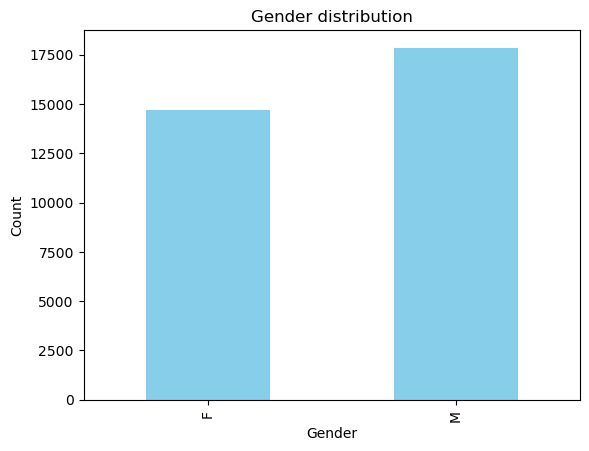

In [45]:
# presenting the gender differences
gender_counts = pd.crosstab(index=df1["gender"], columns="count")

colors = ["skyblue", "lightcoral"]

plt.figure(figsize=(8, 6))
gender_counts.plot(kind='bar', stacked=True, color=colors, legend = False)
plt.title("Gender distribution")
plt.xlabel("Gender")
plt.ylabel("Count")

plt.show()

Most of the participants were male (cca. 17 500), while the rest (cca. 15 000) were female.

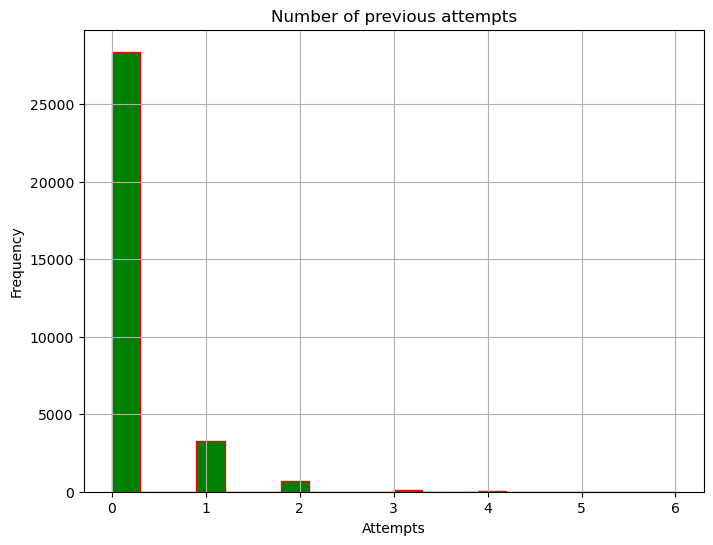

In [46]:
# a histogram presenting the number of previous attempts
plt.figure(figsize=(8, 6))
plt.hist(df1["num_of_prev_attempts"], bins=20, color="green", edgecolor="red")
plt.title("Number of previous attempts")
plt.xlabel("Attempts")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

Most of the participants have never attempted a particular course beforehand, while some of them have attempted it once, even less of them twice and those who attempted a course three or four times are in the vast minority. 

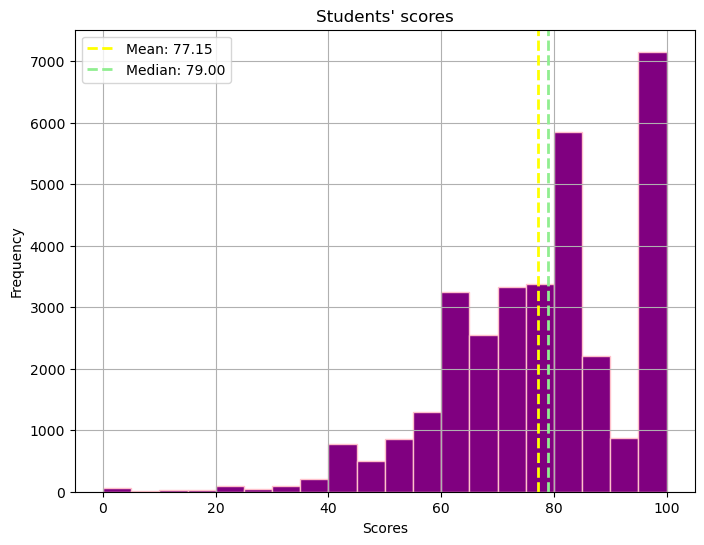

In [47]:
# a histogram depicting students' scores
plt.figure(figsize=(8, 6))
plt.hist(df1["score"], bins=20, color="purple", edgecolor="pink")
plt.title("Students' scores")
plt.xlabel("Scores")
plt.ylabel("Frequency")
plt.grid(True)

mean_scores = df1["score"].mean()
median_scores = df1["score"].median()

plt.axvline(mean_scores, color="yellow", linestyle="dashed", linewidth=2, label=f"Mean: {mean_scores:.2f}")
plt.axvline(median_scores, color="lightgreen", linestyle="dashed", linewidth=2, label=f"Median: {median_scores:.2f}")

plt.legend(loc="upper left")
plt.show()

The mean score of students' scores was 77.15 across all courses, the median was 79. This statistic is positively skewed because of an exceptionally high number of students who achieved a perfect (100) score in their assignments.

In [48]:
df1["highest_education"].unique()

array(['HE Qualification', 'A Level or Equivalent', 'Lower Than A Level',
       'Post Graduate Qualification', 'No Formal quals'], dtype=object)

In [49]:
# mapping levels of education into numerical values for easier access, just like age_band
education_mapping = {"No Formal quals": 0, "Post Graduate Qualification": 1, "Lower Than A Level": 2, "A Level or Equivalent": 3, "HE Qualification": 4}

df1["highest_education_encoded"] = df1["highest_education"].map(education_mapping)

df1

C:\Users\grga3\AppData\Local\Temp\ipykernel_11484\2223702992.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["highest_education_encoded"] = df1["highest_education"].map(education_mapping)


,score,highest_education,sum_click,date_registration,disability,gender,num_of_prev_attempts,age_band_encoded,highest_education_encoded
0,78.0,HE Qualification,4,-159.0,N,M,0.0,2,4
1,70.0,HE Qualification,1,-53.0,N,F,0.0,1,4
2,72.0,A Level or Equivalent,1,-92.0,Y,F,0.0,1,3
3,69.0,A Level or Equivalent,11,-52.0,N,F,0.0,1,3
4,79.0,Lower Than A Level,1,-176.0,N,F,0.0,0,2
...,...,...,...,...,...,...,...,...,...
32588,73.0,Lower Than A Level,1,-4.0,N,F,0.0,0,2
32589,81.0,Lower Than A Level,4,-23.0,N,F,0.0,1,2
32590,77.0,A Level or Equivalent,5,-129.0,Y,F,0.0,0,3
32591,83.0,Lower Than A Level,5,-49.0,N,F,0.0,1,2


In [50]:
df1.drop(("highest_education"), axis=1, inplace=True)
df1

C:\Users\grga3\AppData\Local\Temp\ipykernel_11484\1317475455.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.drop(("highest_education"), axis=1, inplace=True)


,score,sum_click,date_registration,disability,gender,num_of_prev_attempts,age_band_encoded,highest_education_encoded
0,78.0,4,-159.0,N,M,0.0,2,4
1,70.0,1,-53.0,N,F,0.0,1,4
2,72.0,1,-92.0,Y,F,0.0,1,3
3,69.0,11,-52.0,N,F,0.0,1,3
4,79.0,1,-176.0,N,F,0.0,0,2
...,...,...,...,...,...,...,...,...
32588,73.0,1,-4.0,N,F,0.0,0,2
32589,81.0,4,-23.0,N,F,0.0,1,2
32590,77.0,5,-129.0,Y,F,0.0,0,3
32591,83.0,5,-49.0,N,F,0.0,1,2


In [51]:
# using the same principle for gender --> mapping into numerical values for easier use later
gender_mapping = { "M": 0, "F": 1}

df1["gender_encoded"] = df1["gender"].map(gender_mapping)

C:\Users\grga3\AppData\Local\Temp\ipykernel_11484\2054275722.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["gender_encoded"] = df1["gender"].map(gender_mapping)


In [52]:
df1.drop(("gender"), axis=1, inplace=True)
df1

C:\Users\grga3\AppData\Local\Temp\ipykernel_11484\1891531046.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.drop(("gender"), axis=1, inplace=True)


,score,sum_click,date_registration,disability,num_of_prev_attempts,age_band_encoded,highest_education_encoded,gender_encoded
0,78.0,4,-159.0,N,0.0,2,4,0
1,70.0,1,-53.0,N,0.0,1,4,1
2,72.0,1,-92.0,Y,0.0,1,3,1
3,69.0,11,-52.0,N,0.0,1,3,1
4,79.0,1,-176.0,N,0.0,0,2,1
...,...,...,...,...,...,...,...,...
32588,73.0,1,-4.0,N,0.0,0,2,1
32589,81.0,4,-23.0,N,0.0,1,2,1
32590,77.0,5,-129.0,Y,0.0,0,3,1
32591,83.0,5,-49.0,N,0.0,1,2,1


In [53]:
# using the same principle for "disability" --> mapping into numerical values for easier use later
disability_mapping = {"Y": 1, "N": 0}

df1["disability_encoded"] = df1["disability"].map(disability_mapping)

C:\Users\grga3\AppData\Local\Temp\ipykernel_11484\509186036.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["disability_encoded"] = df1["disability"].map(disability_mapping)


In [54]:
df1.drop(("disability"), axis=1, inplace=True)
df1

C:\Users\grga3\AppData\Local\Temp\ipykernel_11484\1561394462.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.drop(("disability"), axis=1, inplace=True)


,score,sum_click,date_registration,num_of_prev_attempts,age_band_encoded,highest_education_encoded,gender_encoded,disability_encoded
0,78.0,4,-159.0,0.0,2,4,0,0
1,70.0,1,-53.0,0.0,1,4,1,0
2,72.0,1,-92.0,0.0,1,3,1,1
3,69.0,11,-52.0,0.0,1,3,1,0
4,79.0,1,-176.0,0.0,0,2,1,0
...,...,...,...,...,...,...,...,...
32588,73.0,1,-4.0,0.0,0,2,1,0
32589,81.0,4,-23.0,0.0,1,2,1,0
32590,77.0,5,-129.0,0.0,0,3,1,1
32591,83.0,5,-49.0,0.0,1,2,1,0


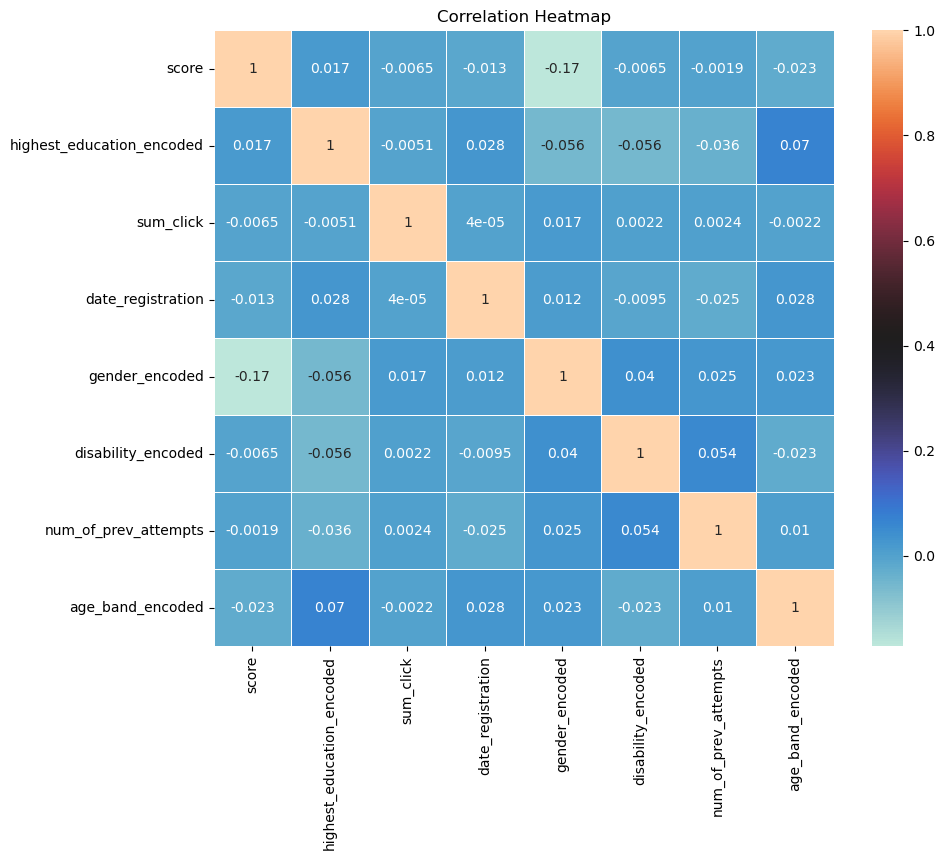

In [55]:
selected_columns = ["score", "highest_education_encoded", "sum_click", "date_registration", "gender_encoded", "disability_encoded", "num_of_prev_attempts", "age_band_encoded"]
selected_df = df1[selected_columns]

# Calculating the correlation matrix
correlation_matrix = selected_df.corr()

# Creating a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="icefire", linewidths=.5)
plt.title("Correlation Heatmap")
plt.show()

The correlation heatmap presents potentially accurate predictions of how certain variables influence others. 

In [56]:
df1.describe()

,score,sum_click,date_registration,num_of_prev_attempts,age_band_encoded,highest_education_encoded,gender_encoded,disability_encoded
count,32548.000000,32548.000000,32548.000000,32548.000000,32548.000000,32548.000000,32548.000000,32548.000000
mean,77.151254,4.275501,-69.411300,0.163144,0.302661,2.690396,0.451610,0.097149
std,17.059073,5.316720,49.260522,0.479452,0.473512,0.766240,0.497661,0.296165
min,0.000000,1.000000,-322.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,66.000000,1.000000,-100.000000,0.000000,0.000000,2.000000,0.000000,0.000000
50%,79.000000,2.000000,-57.000000,0.000000,0.000000,3.000000,0.000000,0.000000
75%,89.000000,5.000000,-29.000000,0.000000,1.000000,3.000000,1.000000,0.000000
max,100.000000,144.000000,167.000000,6.000000,2.000000,4.000000,1.000000,1.000000


The previous table shows min, max, mean and standard deviation values of all the columns observed in the research, encoded by previously mentioned principles.